In [ ]:
# import the necessary library
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
# get the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

# Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=100000, solver='saga')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9214


In [ ]:
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logisticregression', LogisticRegression(random_state=42, solver='saga', max_iter=100000))
])

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV finished.")

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy score: {grid_search.best_score_:.4f}")

Starting GridSearchCV...
Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [ ]:
# Logistic Regression without PCA
default_pipe = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=42, solver='saga', C=0.1))
default_pipe.fit(X_train, y_train)
y_pred = default_pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Logistic Regression without PCA: {accuracy:.4f}")

Accuracy for Logistic Regression without PCA: 0.9258


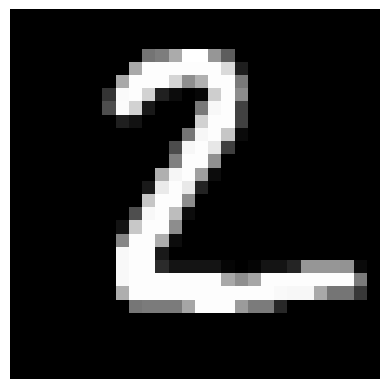

Predicted Label: 2


In [ ]:
# Test the classifier with an actual instance
# Reshape the instance to plot
image = X_test[1].reshape(28, 28)

# Plot the image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

# Select one instance to predict
instance = X_test[1].reshape(1, -1)  # Reshape to keep it 2D for the model

# Predict the label
predicted_label = default_pipe.predict(instance)

print(f"Predicted Label: {predicted_label[0]}")

# Logistic Regression with Dimensionality Reduction

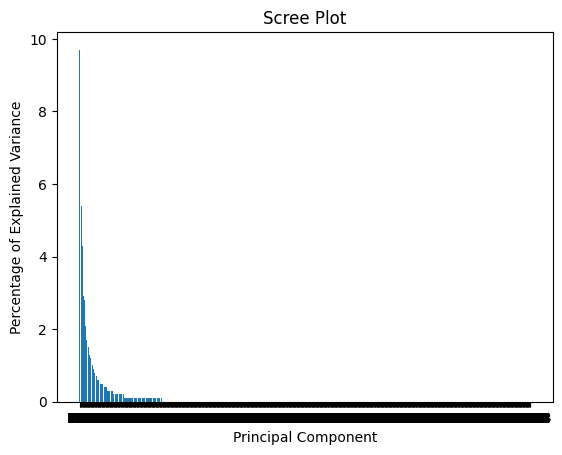

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Initialize a PCA and reduce the dimesion of the original dataset
pca = PCA(n_components=0.95) # We keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier (Logistic Regression)
pca_clf = LogisticRegression(max_iter=100000, random_state=42, solver='saga')

pca_clf.fit(X_train_pca, y_train)

# Predict and compute accuracy
y_pred = pca_clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy after PCA with {pca.n_components_} components: {accuracy:.4f}")

Accuracy after PCA with 154 components: 0.9204


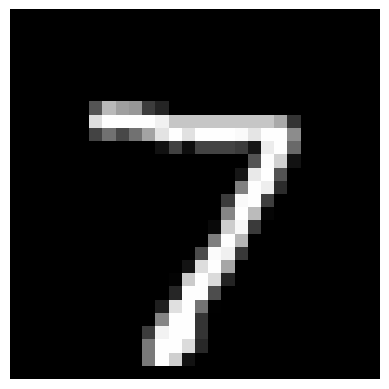

Predicted Label: 7


In [ ]:
# Test the classifier with an actual instance
# Reshape the instance to plot
image = X_test[0].reshape(28, 28)

# Plot the image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

# Select one instance to predict
instance = X_test_pca[0].reshape(1, -1)  # Reshape to keep it 2D for the model

# Predict the label
predicted_label = pca_clf.predict(instance)

print(f"Predicted Label: {predicted_label[0]}")

# Support Vector Machine w/ Kernel (GPU Support)

In [ ]:
# Install missing libraries
!sudo apt-get update
!sudo apt-get install -y libglu1-mesa libx11-dev libxi-dev libxmu-dev libgl-dev

# Download and install CUDA 9.0 silently with --override to replace the current one
!wget -q https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda_9.0.176_384.81_linux-run -O cuda_9.0.176_384.81_linux-run
!chmod +x cuda_9.0.176_384.81_linux-run
!sudo sh cuda_9.0.176_384.81_linux-run --silent --override --toolkit --samples

# Manually specify the toolkit and sample directories
!sudo sh /usr/local/cuda-9.0/bin/cuda-install-samples-9.0.sh /root

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]      
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]        
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]           
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2017 NVIDIA Corporation
Built on Fri_Sep__1_21:08:03_CDT_2017
Cuda compilation tools, release 9.0, V9.0.176


In [ ]:
!pip install thundersvm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.4/507.4 kB 8.9 MB/s eta 0:00:00ta 0:00:01


**Preprocessing**

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# get the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Grid Search SVM + RBF Kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from thundersvm import SVC

# Define parameter grid
param_grid_rbf = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7)
}


# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=3, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 49 candidates, totalling 147 fits
[CV 1/3] END ..............C=0.001, gamma=0.001;, score=0.090 total time=  33.6s
[CV 2/3] END ..............C=0.001, gamma=0.001;, score=0.090 total time=  35.6s
[CV 3/3] END ..............C=0.001, gamma=0.001;, score=0.090 total time=  36.5s
[CV 1/3] END ...............C=0.001, gamma=0.01;, score=0.248 total time=  33.0s
[CV 2/3] END ...............C=0.001, gamma=0.01;, score=0.202 total time=  33.2s
[CV 3/3] END ...............C=0.001, gamma=0.01;, score=0.191 total time=  33.0s
[CV 1/3] END C=0.001, gamma=0.09999999999999999;, score=0.112 total time=  33.0s
[CV 2/3] END C=0.001, gamma=0.09999999999999999;, score=0.112 total time=  32.9s
[CV 3/3] END C=0.001, gamma=0.09999999999999999;, score=0.112 total time=  33.6s
[CV 1/3] END ................C=0.001, gamma=1.0;, score=0.112 total time=  33.2s
[CV 2/3] END ................C=0.001, gamma=1.0;, score=0.112 total time=  33.4s
[CV 3/3] END ................C=0.001, gamma=1.0

In [ ]:
from thundersvm import SVC

# Initialize the SVM classifier with an RBF kernel
model = SVC(kernel='rbf', C=100, gamma=0.01)

# Train the model
model.fit(X_train, y_train)


# Check test set accuracy
accuracy = model.score(X_test, y_test)

print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9823


## SVM + Polynomial kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from thundersvm import SVC


# Define hyperparameter grid for Polynomial Kernel SVM
param_grid_poly = {
    'C': np.logspace(-3, 3, 7),
    'degree': [2, 3, 4, 5],
    'coef0': [0, 0.5, 1, 2]
}

# Perform Grid Search for Polynomial Kernel SVM
grid_poly = GridSearchCV(SVC(kernel='polynomial'), param_grid_poly, cv=3, scoring='accuracy', verbose=3)
grid_poly.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_poly.best_params_)
print("Best Accuracy:", grid_poly.best_score_)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV 1/3] END ........C=0.001, coef0=0, degree=2;, score=0.089 total time=  36.4s
[CV 2/3] END ........C=0.001, coef0=0, degree=2;, score=0.091 total time=  32.3s
[CV 3/3] END ........C=0.001, coef0=0, degree=2;, score=0.091 total time=  30.9s
[CV 1/3] END ........C=0.001, coef0=0, degree=3;, score=0.089 total time=  29.5s
[CV 2/3] END ........C=0.001, coef0=0, degree=3;, score=0.091 total time=  28.9s
[CV 3/3] END ........C=0.001, coef0=0, degree=3;, score=0.091 total time=  29.7s
[CV 1/3] END ........C=0.001, coef0=0, degree=4;, score=0.089 total time=  29.9s
[CV 2/3] END ........C=0.001, coef0=0, degree=4;, score=0.091 total time=  29.5s
[CV 3/3] END ........C=0.001, coef0=0, degree=4;, score=0.091 total time=  29.4s
[CV 1/3] END ........C=0.001, coef0=0, degree=5;, score=0.089 total time=  29.0s
[CV 2/3] END ........C=0.001, coef0=0, degree=5;, score=0.091 total time=  30.1s
[CV 3/3] END ........C=0.001, coef0=0, degree=

In [ ]:
from thundersvm import SVC

# Initialize the SVM classifier with an Polynomial kernel
model = SVC(kernel='polynomial', C=1000, coef0=0, degree=2)

# Train the model
model.fit(X_train, y_train)


# Check test set accuracy
accuracy = model.score(X_test, y_test)

print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9803


## SVM + Linear kernel

In [ ]:
from sklearn.model_selection import GridSearchCV
from thundersvm import SVC

# Define hyperparameter grid for Linear SVM
param_grid_linear = {'C': np.logspace(-3, 3, 7)}


# Perform Grid Search for Linear SVM
grid_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=3, scoring='accuracy', verbose=3)
grid_linear.fit(X_train, y_train)
best_curr_C_linear = grid_linear.best_params_['C']

# Print best parameters
print("Best Parameters:", grid_linear.best_params_)
print("Best Accuracy:", grid_linear.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END ...........................C=0.001;, score=0.921 total time=  26.9s
[CV 2/3] END ...........................C=0.001;, score=0.917 total time=  24.1s
[CV 3/3] END ...........................C=0.001;, score=0.921 total time=  23.9s
[CV 1/3] END ............................C=0.01;, score=0.937 total time=  19.4s
[CV 2/3] END ............................C=0.01;, score=0.935 total time=  17.9s
[CV 3/3] END ............................C=0.01;, score=0.938 total time=  18.4s
[CV 1/3] END .............C=0.09999999999999999;, score=0.940 total time=  20.0s
[CV 2/3] END .............C=0.09999999999999999;, score=0.938 total time=  23.2s
[CV 3/3] END .............C=0.09999999999999999;, score=0.941 total time=  23.4s
[CV 1/3] END .............................C=1.0;, score=0.931 total time=  37.6s
[CV 2/3] END .............................C=1.0;, score=0.932 total time=  36.9s
[CV 3/3] END .............................C=1.0;,

In [ ]:
from thundersvm import SVC

# Initialize the SVM classifier with an RBF kernel
model = SVC(kernel='linear', C=0.1)

# Train the model
model.fit(X_train, y_train)


# Check test set accuracy
accuracy = model.score(X_test, y_test)

print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9469
